<a href="https://colab.research.google.com/github/mateusgandra/data_science/blob/master/Analisando_os_Crimes_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---


## Analisando a Violência no Rio de Janeiro

<img alt="Landscape Munique" width="100%" src="https://github.com/mateusgandra/suporte/blob/master/violencia_rj.png?raw=true">


O Rio de Janeiro é um estado que vivê uma triste dualidade na cabeça dos brasileiros e talvez de todos que acompanham as notícias no país. É um estado que remete a lindas paisagens seja com aspectos serranos (como Petrópolis, Nova Friburgo e Teresópolis), seja com aspectos litorâneos (como Rio de Janeiro, Buzios e Parati). A prórpia capital do estodo nspiração para músicas memoráveis (Garota de Ipanema - Tom Jobim), contem paiságens que são "de tirar o fôlego" (Pão de Açucar e Corcovado). Por outro lado, é um estado marcado por uma violência em níveis de gerras com presença de facções criminosas, grande disponibilidade de armas de fogo, territórios complexos e com urbanização caótica e elevado contingente de crianças e jovens sem acesso a um desenvolvimento infantil minimamente razoável (Fonte: [Revista Época](https://epoca.globo.com/brasil/noticia/2018/02/o-rio-de-janeiro-tem-solucao.html)).
Este projeto visa analisar de maneira simplificada algumas das variaives consideradas para quantificar a violência na cidade do Rio de Janeiro.

##Obtenção dos dados

As informações trabalhadas nesse projeto estão disponíveis no site do Governo do Estado do Rio de Janeiro - Instituto de Segurança Pública ["ISP - Dados Abertos"](http://www.ispdados.rj.gov.br/estatistica.html).

O arquivo CSV utilizado "Estatísticas de segurança: série histórica mensal por área de delegacia desde 01/2003", disponíveis neste [**link**](http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv), cobre valores mensais de ações que ferem a segurança no estado desde o ano de 2013, em uma contagem mensal.

In [ ]:
# Importa as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importa os arquivos
data = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='iso-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,30,37,45,46,47,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Cria uma cópia independente do dataset e mostra as primeiras cinco linhas
df = data.copy(deep=True)
df.head()

,CISP,mes,ano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0,32,0,10,,4,100,12,30,0,37,,90,169,0,1,0,69,1,,,,5,,,,,21,2,0,0,0,0,0,66,5,1,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,3,0,47,1,4,35,5,0,9,1,25,12,0,1,14,1,3,,11,82,9,42,5,23,,36,115,0,1,0,1,35,,,,7,,,,,15,6,0,1,0,0,3,51,9,1,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,3,1,73,2,1,19,10,1,11,5,26,4,2,0,34,2,4,,24,123,28,42,2,47,,97,216,0,0,0,37,4,,,,10,,,,,47,2,1,0,0,0,3,64,11,5,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,6,2,43,2,1,20,10,0,27,6,14,22,0,0,20,0,6,,38,143,17,4,0,8,,61,90,0,0,0,8,20,,,,77,,,,,26,2,1,0,0,0,6,56,27,6,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,4,2,18,2,0,2,0,2,23,1,4,0,0,0,1,0,1,,23,55,12,1,0,1,,21,35,0,0,0,4,3,,,,9,,,,,10,1,3,0,0,0,4,5,23,1,147,3


## Análise descritiva e preparo do dataset

In [ ]:
# Retorna todas as variáveis do dataset
df.columns

Index(['CISP', 'mes', 'ano', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc',
       'Regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver',

Descrição das variáveis presentes no banco de dados e que são apresentadas nesse projeto:
* *mes:* Mês da comunicação da ocorrência;
* *vano:* Ano da comunicação da ocorrência;
* *hom_doloso:* Homicídio doloso;
* *roubo_em_coletivo:* Roubo em coletivo;
* *roubo_veiculo:* Roubo de veículos;
* *furto_veiculos:* Furto de veículos;
* *recuperacao_veiculos:* Recuperação de veículos.

O dicionário informações sobre todas as variáveis presentes no banco de dados pode ser encontrado no mesmo site, na aba ["Notas Metodológicas e Dicionários"](http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx)

In [ ]:
# Identifica o tamado do banco de dados
print("O banco de dados têm {:,} variáveis e {:,} entradas".format(df.shape[1], df.shape[0]))

O banco de dados têm 65 variáveis e 27,998 entradas


In [ ]:
# Variáveis disponíveis no dataset e informações sobre as mesmas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27998 entries, 0 to 27997
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CISP                        27998 non-null  int64 
 1   mes                         27998 non-null  int64 
 2   ano                         27998 non-null  int64 
 3   mes_ano                     27998 non-null  object
 4   AISP                        27998 non-null  int64 
 5   RISP                        27998 non-null  int64 
 6   munic                       27998 non-null  object
 7   mcirc                       27998 non-null  int64 
 8   Regiao                      27998 non-null  object
 9   hom_doloso                  27998 non-null  int64 
 10  lesao_corp_morte            27998 non-null  int64 
 11  latrocinio                  27998 non-null  int64 
 12  hom_por_interv_policial     27998 non-null  int64 
 13  letalidade_violenta         27998 non-null  in

Das 65 entradas 13 **não** são do tipo inteiro. De acordo com os dados esperados para elas, deveriam ser.

Nessa mesma análise, é possível observar que nenhum variável foi indicada como contendo dados nulos. Contudo, uma rápida checagem em algumas das colunas indicadas como tipo inteiro mostram células sem informações, mas fora do formado da biblioteca numpy (NaN). Uma possibilidade seria o preenchimento com um espaço (tem caractere, mas não tem informação textual).

Uma vez constatado isso, as células serão substituidas por "np.NaN" que é o indicativo de células vazia

In [ ]:
# Retira os espaço entre os nomes presentes na columa "munic" e "Regiao"
df['munic'] = df['munic'].str.lower().str.strip().str.replace(' ','_')
df['Regiao'] = df['Regiao'].str.lower().str.strip().str.replace(' ','_')


# checa se as células apresetam espaço ou caractere especial. Se positivo, substitui por "np.NaN"
df = df.replace(' ', np.NaN, regex=True)


O dataset reflete um conjunto de informações coletadas no espaço organizadas de acordo com um período de tempo (ano e mês). Para uma melhor organização do trabalho com esse tipo de variável, as colunas com informação sobre mês e ano serão agrupadas em uma outra coluna chamada "data" que será o tipo "datetime".
Variáveis referntes à região do estado (centro ou inter) em que a cidade onde a variável foi obversada está localizada, bem como referentes informações às unidades de segurançça nãos erão abordadas nesse estudo e, por isso, serão retiradas do dataset.

In [ ]:
# Cria uma coluna com o mesmo nome e usa as variáveis de 'mes' e 'ano' para preenche-la no formato 'datetime'
for i in [df]:
  i['mes'] = i['mes'].apply(lambda x: str(x))
  i['ano'] = i['ano'].apply(lambda x: str(x))
  i['data'] = pd.to_datetime(i['ano']+i['mes'],format='%Y%m')

# Coloca como índice do dataframe as informações presentes na coluna 'data'
df = df.rename(df.data, axis='index')
df.drop(['data'], axis=1, inplace=True)

# Retorna o nome de todas as colunas no formato de letras minúsculas
df.columns = df.columns.str.lower()


Uma vez que os dados estejam organizados, é importante analisar a quantidade de valores faltantes em nosso dataset.

In [ ]:
# Checa quais variáveis têm valores faltantes (mostra os 15 primeiros e ordem decrescente)
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)[:15]

roubo_bicicleta               0.621080
furto_bicicleta               0.621080
trafico_drogas                0.165940
cmba                          0.165940
posse_drogas                  0.165940
apreensao_drogas_sem_autor    0.165940
apf                           0.165940
aaapai                        0.165940
cmp                           0.165940
mes_ano                       0.039146
roubo_cx_eletronico           0.000679
lesao_corp_morte              0.000000
hom_doloso                    0.000000
roubo_banco                   0.000000
mes                           0.000000
dtype: float64

Acima, é possível ver que algumas das variáveis têm valores faltantes. Em especial, crimes relacionados a bicilcetas (cerca de 60%) e apreensão de drogas (cerca de 16%).

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como utilizando temas e perspectivas,como por exemplo:

* Números anuais por crime;
* Números mensais por crime;
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

## Informações Estatísticas da Violência no Rio de Janeiro

Uma das variáveis do dataset classifica se os dados colhidos pertenciam à capital do estado ou à região interiorana. Para esse projeto, iremos abordar apenas os dados referentes à capital.

In [ ]:
#Selcionnar apenas a cidade do Rio de Janeiro
df_c = df[df.regiao=='capital']

###Crimes contra o patrimônio - Veículos
Breve contextualização sobre roubos de *veículos*

Esta etapa incluirá apenas as variáveis `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`. 

In [ ]:
# Retorna um dataset com variáveis selecionadas
df_v = df_c[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']]


In [ ]:
# Retorna análise estatística descritiva
df_v.describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,8409.000000,8409.000000,8409.000000
mean,37.909502,18.156618,28.153764
std,38.376506,15.911531,31.966015
min,0.000000,0.000000,0.000000
25%,8.000000,7.000000,6.000000
50%,26.000000,13.000000,18.000000
75%,56.000000,25.000000,40.000000
max,394.000000,173.000000,359.000000


Para os próximos passos as variáveis "`roubo_veiculo`", "furto_veiculos" e "recuperacao_veiculos" serão avaliadas quanto a presença de outliers. Para essa etapa será utilizada a regra 1.5xIQR (Interquartile Range).


In [ ]:
# Limites para a variáveil "roubo_veiculo" 
Q1 = df_v['roubo_veiculo'].quantile(q = 0.25)
Q3 = df_v['roubo_veiculo'].quantile(q = 0.75)
IQR = Q3 - Q1

lower = (Q1 - 1.5*IQR)
upper = (Q3 + 1.5*IQR)

print("Lower = {}".format(lower))
print("Upper = {}".format(upper))

Lower = -64.0
Upper = 128.0


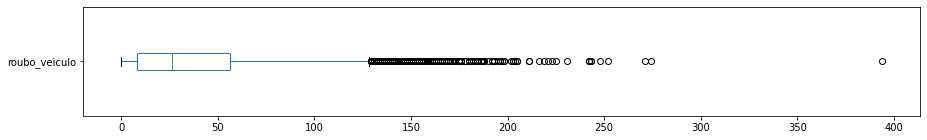

roubo_veiculo: valores acima de 128
290 entradas
3.45%


In [ ]:
#Boxplot para a variável "roubo_veiculo"
df_v['roubo_veiculo'].plot(kind='box', vert=False, figsize=(15,2))
plt.show()

#Ver a quantidade de valores acima de 128 ocorrências para "roubo_veiculo" (1.5*IQR)
print("roubo_veiculo: valores acima de 128")
print("{} entradas".format(len(df_v[df_v.roubo_veiculo > 128])))
print("{:.2f}%".format((len(df_v[df_v.roubo_veiculo > 128]) / df_v.shape[0])*100))

In [ ]:
# Limites para a variável "furto_veículos".
Q1 = df_v['furto_veiculos'].quantile(q = 0.25)
Q3 = df_v['furto_veiculos'].quantile(q = 0.75)
IQR = Q3 - Q1

lower = (Q1 - 1.5*IQR)
upper = (Q3 + 1.5*IQR)

print("Lower = {}".format(lower))
print("Upper = {}".format(upper))

Lower = -20.0
Upper = 52.0


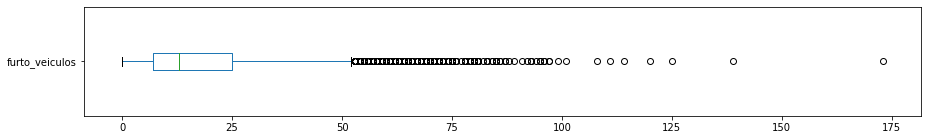

furto_veiculos: valores acima de 52
2268 entradas
26.97%


In [ ]:
#Boxplot para a variável "furto_veiculos"

df_v.furto_veiculos.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

#Ver a quantidade de valores acima de 52 ocorrências para "roubo_veiculo" (1.5*IQR)
print("furto_veiculos: valores acima de 52")
print("{} entradas".format(len(df_v[df_v.roubo_veiculo > 52])))
print("{:.2f}%".format((len(df_v[df_v.roubo_veiculo > 52]) / df_v.shape[0])*100))

In [ ]:
# Limites para a variável "recuperacao_veiculos"
Q1 = df_v['recuperacao_veiculos'].quantile(q = 0.25)
Q3 = df_v['recuperacao_veiculos'].quantile(q = 0.75)
IQR = Q3 - Q1

lower = (Q1 - 1.5*IQR)
upper = (Q3 + 1.5*IQR)

print("Lower = {}".format(lower))
print("Upper = {}".format(upper))

Lower = -45.0
Upper = 91.0


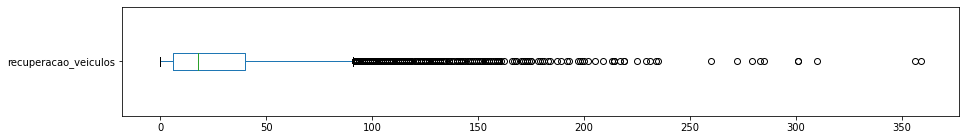

furto_veiculos: valores acima de 91
834 entradas
9.92%


In [ ]:
# Boxplot para a variável "recuperação_veículos"
df_v.recuperacao_veiculos.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

#Ver a quantidade de valores acima de 91 ocorrências para "recuperacao_veiculo" (1.5*IQR)
print("furto_veiculos: valores acima de 91")
print("{} entradas".format(len(df_v[df_v.roubo_veiculo > 91])))
print("{:.2f}%".format((len(df_v[df_v.roubo_veiculo > 91]) / df_v.shape[0])*100))

Outliers são dados que podem comprometer muito a análise dos dados por influenciar diretamente medidas como as de centralidade. Contudo, como este caso reflete um número acumulado de ocorrências em um mês segmentado ano a ano, será feita uma observação mais cautelosa.

Os daddos serãoo classificados em dois grupos:
* **normal:** Dias de ocorrência em que todos os dados reportados estejam dentros do range de normalidade indicado nas células acima;
* **out:** Dias de ocorrência em que peloo menos um dados reportado esteja fora do range de normalidade indicado nas células acima.

In [ ]:
# Adiciona uma coluna com a classificação "normal" (recebe valor 1) ou "out" (recebe valor 0):

def classifier(row):
  if row['roubo_veiculo'] <= 128 and row['furto_veiculos'] <= 52 and row['recuperacao_veiculos'] <= 91:
    return 1
  else:
    return 0

df_v['classe'] = df_v.apply(classifier, axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_v.head()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos,classe
2003-01-01,5,12,5,1
2003-01-01,9,9,7,1
2003-01-01,11,28,10,1
2003-01-01,27,17,77,1
2003-01-01,23,12,9,1


In [ ]:
# Agrupa os dados por valores mensais do índice do dataset
df_v_1 = df_v[df_v.classe==1].groupby(pd.Grouper(freq="M")).sum()
df_v_0 = df_v[df_v.classe==0].groupby(pd.Grouper(freq="M")).sum()

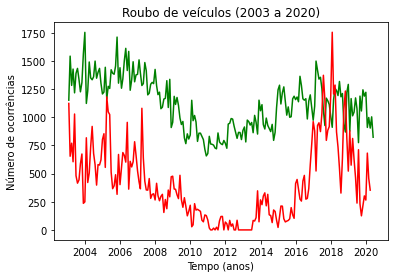

In [ ]:
# Plota o gráfico de linhas com os dados para roubo veículo,
plt.plot(df_v_1.index, df_v_1.roubo_veiculo, color='green')
plt.plot(df_v_0.index, df_v_0.roubo_veiculo, color='red')
plt.xlabel('Tempo (anos)')
plt.ylabel('Número de ocorrências')
plt.title('Roubo de veículos (2003 a 2020)')
plt.show()

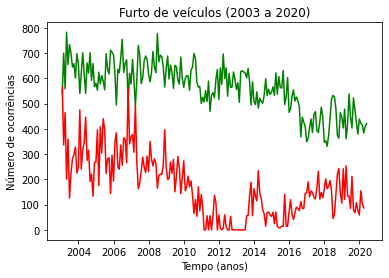

In [ ]:
# Plota o gráfico de linhas com os dados para furto de veículos:
plt.plot(df_v_1.index, df_v_1.furto_veiculos, color='green')
plt.plot(df_v_0.index, df_v_0.furto_veiculos, color='red')
plt.xlabel('Tempo (anos)')
plt.ylabel('Número de ocorrências')
plt.title('Furto de veículos (2003 a 2020)')
plt.show()

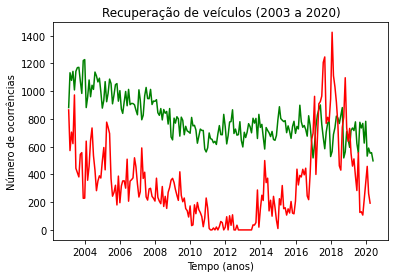

In [ ]:
# Plota o gráfico de linhas com os dados para roubo veículo,
plt.plot(df_v_1.index, df_v_1.recuperacao_veiculos, color='green')
plt.plot(df_v_0.index, df_v_0.recuperacao_veiculos, color='red')
plt.xlabel('Tempo (anos)')
plt.ylabel('Número de ocorrências')
plt.title('Recuperação de veículos (2003 a 2020)')
plt.show()

Nas figuras acima, a linha verde indica o volume de roubos de veículos por mês ao retirarmos os dias indicados como outliers e a linha vermelha refere-se aos dias indicados como outilers.
Ambas as linhas tendem a seguirm um mesmo padrão de ascenção e queda e ganham um enfoque maior nas proximidasdes do ano de 2005, 2007 e 2017. O padrão observado para o gráfico de "recuperação" tem semelhança com os gráficos de "roubo" e "furto".

O número de ocorrências reportadas acima das médias máximas de normalidade poderia estar relacionado a momentos de deflagração de operações policiais ou mesmo a eventos que a cidade do Rio de Janeiro sediou (muitos deles n, mesmo ano), tendo como exemplo: Olimpíadas, Jogos Pan-Americanos, Festivall Rock & Rio e Copa do Mundo de Futebol.

Uma forma de quantificar os crimes contra patrimônio em veículos, é calcular a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

Quanto mais próximo de 100% maior a eficácia no retorno dos bens extraviados.

In [ ]:
print("A média, por mês, de carros roubados é {:.2f}, a média de carros furtados é {:.2f} e a média de carros recuperados é {:.2f}"\
      .format(df_v.roubo_veiculo.mean(), df_v.furto_veiculos.mean(), df_v.recuperacao_veiculos.mean()))
print("A porcentagem, por mês, de carros recuperados é {:.2f}%"\
      .format((df_v.recuperacao_veiculos.sum()/(df_v.roubo_veiculo.sum() + df_v.furto_veiculos.sum()))*100))

A média, por mês, de carros roubados é 37.91, a média de carros furtados é 18.16 e a média de carros recuperados é 28.15
A porcentagem, por mês, de carros recuperados é 50.22%


### Crimes contra a vida




Abaixo identificamos a quantidade de homicídios doloso ao longo do período registrado no dataset

In [ ]:
# Agrupa os dados por valores mensais do índice do dataset
df_h = df.groupby(pd.Grouper(freq="M")).sum()

# Retorna a quantidade de homicídio doloso
max_hom_doloso = df_h.hom_doloso.max()
min_hom_doloso = df_h.hom_doloso.min()

print("Máxima: {}".format(max_hom_doloso))
print("Mínima: {}".format(min_hom_doloso))

Máxima: 682
Mínima: 272


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos. 

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos.

Vamos investigar um pouco mais a fundo essas entradas.


In [ ]:
# Retorna o mês com menor número de homicídios
df_h[df_h.hom_doloso==272][['hom_doloso']]

,hom_doloso
2015-06-30,272


In [ ]:
# Retorna o mês com maior número de homicídios
df_h[df_h.hom_doloso==682][['hom_doloso']]

,hom_doloso
2005-03-31,682


Acima, vemos que o mês de março de 2005 foi o mês com mais casos de homicídios dollosos registrados no nosso dataset, o mês de junho de 2015 teve menor número desse tipo de ocorrência.

Isso sugere um bom sinal, indicando que, talvez, o crime venha diminuindo. Apenas uma análise mais aprofundada pode nos dizer.

##Visualização de Dados

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável `hom_doloso`.

In [ ]:
df_h.hom_doloso.shape[0]

209

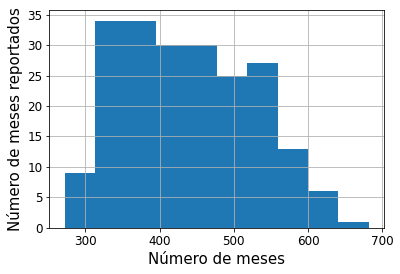

In [ ]:
# Retorna um gráfico do tipo histograma para homicidio_doloso
df_h.hom_doloso.hist(grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("Número de meses", fontsize=15)
plt.ylabel("Número de meses reportados",fontsize=15);

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houve mais de 30 meses com 300-400 homicídios dolosos registrados ao longo do período em estudo.
* Houve menos de 10 meses ao longo de todo o período estudado entre 600 e 700 registros de homicídio doloso.
* Outras possíveis análises pertinentes...

Por último, vamos analisar a variável `roubo_em_coletivo` utilizando um gráfico de linha.

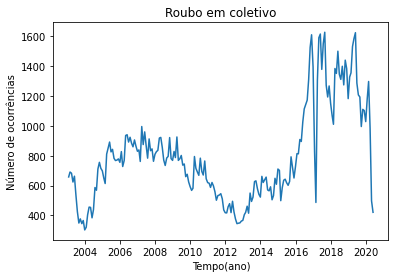

In [ ]:
#Retorna um gráfico de linhas para roubo em coletivo

plt.plot(df_h.index, df_h.roubo_em_coletivo)
plt.xlabel("Tempo(ano)")
plt.ylabel("Número de ocorrências")
plt.title("Roubo em coletivo")
plt.show()

## Conclusão

A principal lição aprendida aqui foi a necessidade de se atentar a cada detalhe do seu *dataset* quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos.

Muitas vezes, nos acostumamos a usar dados de competições ou cursos, que estão perfeitos.

Eu ressalto novamente, a etapa de aquisição, tratamento e exploração dos dados é o que mais vai consumir o tempo do seu projeto. Dedique sempre um bom tempo a esta etapa.